# Boat sounds - Exploratory Data Analysis

## Import lib

In [1]:
!pip install mutagen

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 1.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import os
import mutagen
import mutagen.wave
import librosa.display
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

## Create dataset

In [4]:
def create_dataset_df(directory, output_csv_path):
    """
    Create a dataset DataFrame with filenames and random labels, and export to a CSV file.

    Parameters:
    directory (str): The directory containing the .wav files.
    output_csv_path (str): The path to save the output CSV file.

    Returns:
    pd.DataFrame: The DataFrame containing filenames and random labels.
    """
    # List of possible labels
    labels = ['passenger', 'yacht', 'natural ambient noise', 'tugboat']

    # List to hold file information
    file_info = []
    i = 0
    # Read the directory and extract file names
    for filename in os.listdir(directory):
        if filename.endswith(".wav"):
            # Append file name and label to the list
            file_info.append({"file_name": filename, "label": labels[i], 'filepath':"audio/"+filename})
            i = i + 1
            print(i)

    # Create DataFrame from the list
    df = pd.DataFrame(file_info)

    # Export DataFrame to CSV
    df.to_csv(output_csv_path, index=False)

    return df

# Example usage
directory = "audio"
output_csv_path = "boat_sound.csv"
df = create_dataset_df(directory, output_csv_path)

# Display the DataFrame
print(f"DataFrame has been exported to {output_csv_path}")
print(df)

1
2
3
4
DataFrame has been exported to boat_sound.csv
                             file_name                  label  \
0           79__23_07_13_H3_zodiac.wav              passenger   
1    6__10_07_13_marDeCangas_Entra.wav                  yacht   
2           82__27_09_13_H3_lluvia.wav  natural ambient noise   
3  22__19_07_13_adventure_maniobra.wav                tugboat   

                                    filepath  
0           audio/79__23_07_13_H3_zodiac.wav  
1    audio/6__10_07_13_marDeCangas_Entra.wav  
2           audio/82__27_09_13_H3_lluvia.wav  
3  audio/22__19_07_13_adventure_maniobra.wav  


### Display the labels distribution

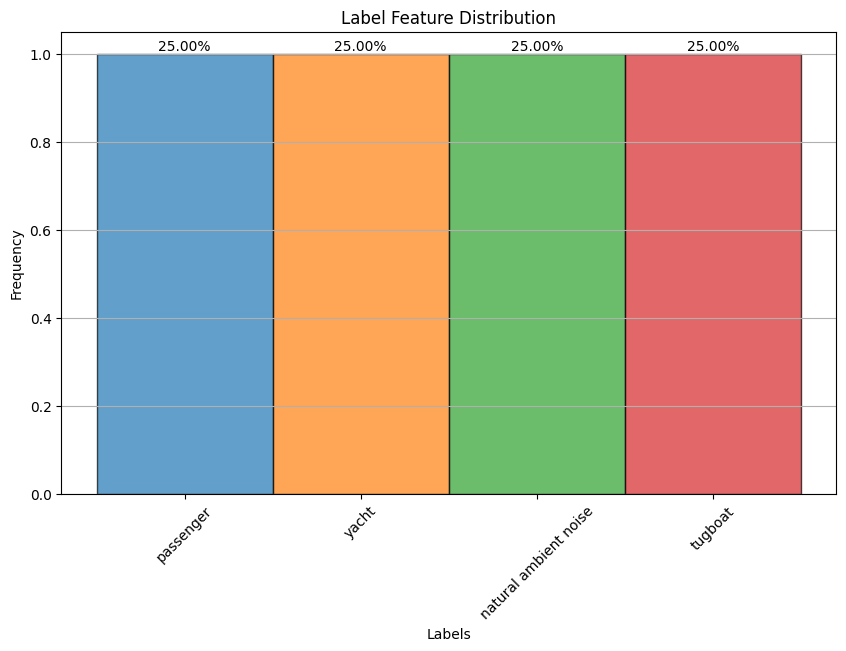

In [5]:
# Create the histogram for multi-label data
plt.figure(figsize=(10, 6))

# Define the labels and their respective colors
unique_labels = df["label"].unique()
colors = plt.cm.tab10(range(len(unique_labels)))  # Use a colormap for colors

# Plot the histogram
n, bins, patches = plt.hist(df["label"], bins=len(unique_labels), edgecolor='k', alpha=0.7)

# Apply colors to the patches
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

# Calculate and annotate percentages
total = len(df["label"])
for count, patch in zip(n, patches):
    percentage = (count / total) * 100
    plt.text(patch.get_x() + patch.get_width() / 2, count, f'{percentage:.2f}%', ha='center', va='bottom')

# Set the x-ticks to the center of each bin
bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.xticks(bin_centers, unique_labels, rotation=45)

# Customize the plot
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Label Feature Distribution')
plt.grid(axis='y')
plt.show()

## Audio file statistics

In [6]:
def get_audio_metadata_mutagen(filepath):
    metadata = {}
    f = mutagen.wave.WAVE(filepath)
    metadata['length'] = f.info.length
    metadata['bitrate'] = f.info.bitrate
    metadata['channels'] = f.info.channels
    metadata['sample_rate'] = f.info.sample_rate
    metadata['bits_per_sample'] = f.info.bits_per_sample
    return metadata


def compute_audio_statistics(dataset_df):
    metadata_dict = {'length': [], 'bitrate': [], 'channels': [], 'sample_rate': [], 'bits_per_sample': []}
    # Extract metadata
    for filepath in dataset_df['filepath']:
        metadata = get_audio_metadata_mutagen(filepath)
        for key in metadata_dict.keys():
            metadata_dict[key].append(metadata[key])
    # Add new columns to dataframe
    for key in metadata_dict.keys():
        dataset_df[key] = metadata_dict[key]

    return dataset_df

In [7]:
audio_statistics_df = compute_audio_statistics(df)
audio_statistics_df

,file_name,label,filepath,length,bitrate,channels,sample_rate,bits_per_sample
0,79__23_07_13_H3_zodiac.wav,passenger,audio/79__23_07_13_H3_zodiac.wav,99.933933,1265616,1,52734,24
1,6__10_07_13_marDeCangas_Entra.wav,yacht,audio/6__10_07_13_marDeCangas_Entra.wav,301.360356,1265616,1,52734,24
2,82__27_09_13_H3_lluvia.wav,natural ambient noise,audio/82__27_09_13_H3_lluvia.wav,120.004551,1265616,1,52734,24
3,22__19_07_13_adventure_maniobra.wav,tugboat,audio/22__19_07_13_adventure_maniobra.wav,53.643475,1265616,1,52734,24


In [8]:
audio_statistics_df.describe()

,length,bitrate,channels,sample_rate,bits_per_sample
count,4.000000,4.0,4.0,4.0,4.0
mean,143.735579,1265616.0,1.0,52734.0,24.0
std,108.695145,0.0,0.0,0.0,0.0
min,53.643475,1265616.0,1.0,52734.0,24.0
25%,88.361318,1265616.0,1.0,52734.0,24.0
50%,109.969242,1265616.0,1.0,52734.0,24.0
75%,165.343502,1265616.0,1.0,52734.0,24.0
max,301.360356,1265616.0,1.0,52734.0,24.0


In [9]:
audio_statistics_df['sample_rate'].value_counts(), audio_statistics_df['bits_per_sample'].value_counts()

(sample_rate
 52734    4
 Name: count, dtype: int64,
 bits_per_sample
 24    4
 Name: count, dtype: int64)

In [10]:
audio_statistics_df.groupby('label').describe()

length                                          \
                       count        mean std         min         25%   
label                                                                  
natural ambient noise    1.0  120.004551 NaN  120.004551  120.004551   
passenger                1.0   99.933933 NaN   99.933933   99.933933   
tugboat                  1.0   53.643475 NaN   53.643475   53.643475   
yacht                    1.0  301.360356 NaN  301.360356  301.360356   

                                                          bitrate             \
                              50%         75%         max   count       mean   
label                                                                          
natural ambient noise  120.004551  120.004551  120.004551     1.0  1265616.0   
passenger               99.933933   99.933933   99.933933     1.0  1265616.0   
tugboat                 53.643475   53.643475   53.643475     1.0  1265616.0   
yacht                  301.360356  301.360356  301.360356     1.0  1265616.0   

                       ... sample_rate          bits_per_sample            \
                       ...         75%      max           count  mean std   
label                  ...                                                  
natural ambient noise  ...     52734.0  52734.0             1.0  24.0 NaN   
passenger              ...     52734.0  52734.0             1.0  24.0 NaN   
tugboat                ...     52734.0  52734.0             1.0  24.0 NaN   
yacht                  ...     52734.0  52734.0             1.0  24.0 NaN   

                                                     
                        min   25%   50%   75%   max  
label                                                
natural ambient noise  24.0  24.0  24.0  24.0  24.0  
passenger              24.0  24.0  24.0  24.0  24.0  
tugboat                24.0  24.0  24.0  24.0  24.0  
yacht                  24.0  24.0  24.0  24.0  24.0  

[4 rows x 40 columns]

## Data Visualization

### Waveplots

First we can visualize the waveform for different random samples of each class

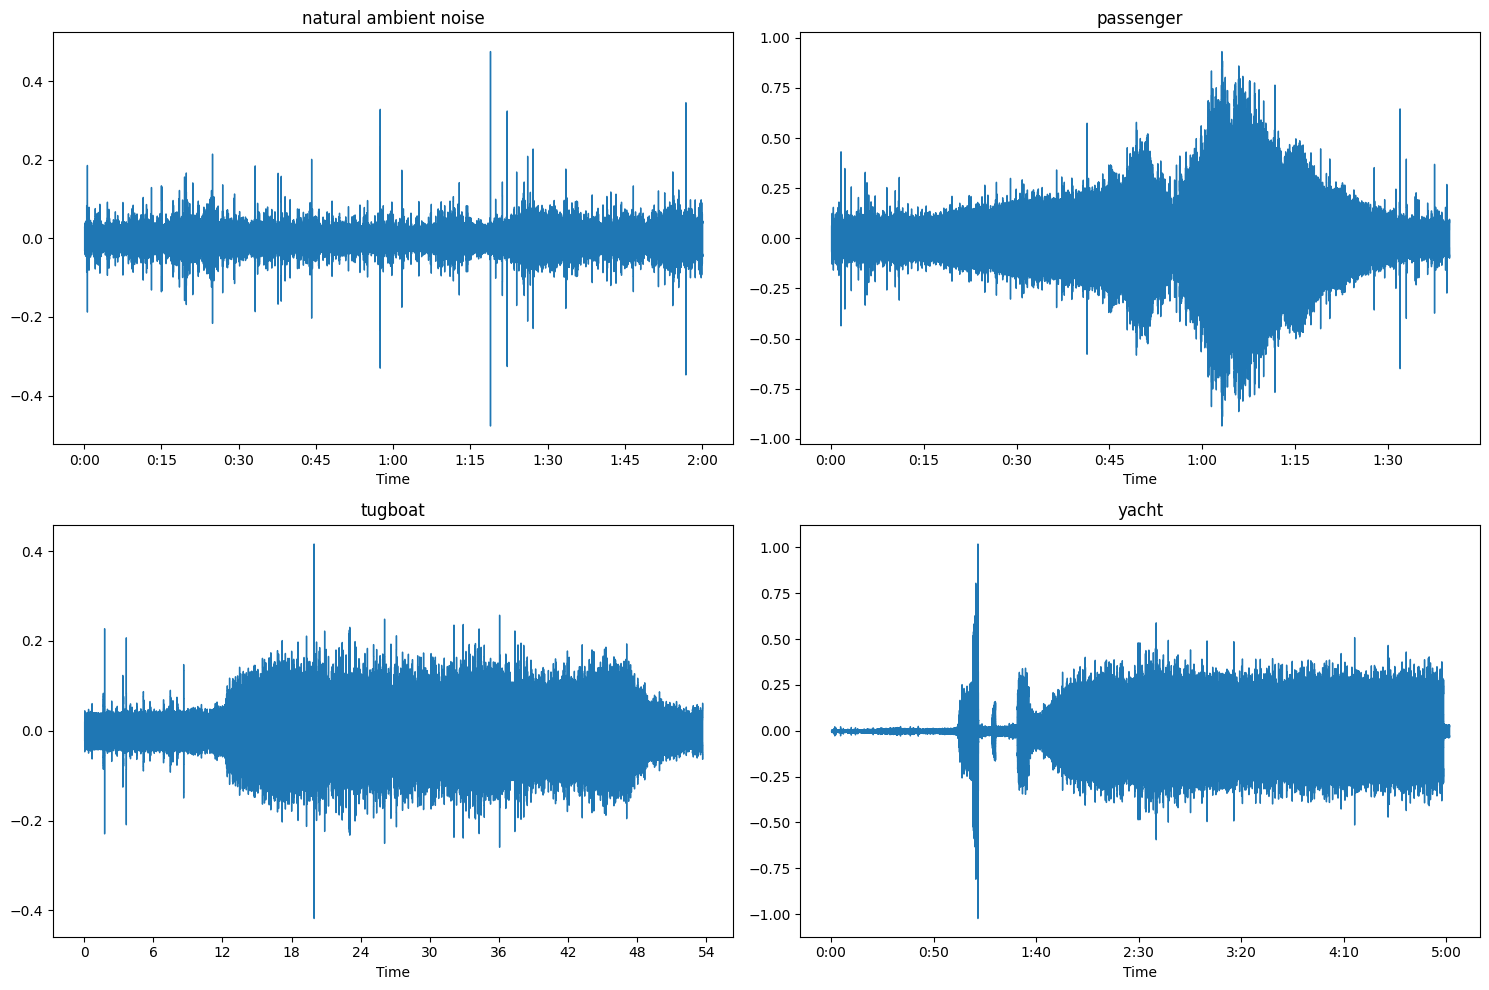

In [11]:
def plot_waveplots(df):
  # Randomly select one sample of each class
  random_samples = df.groupby('label').sample(1)
  audio_samples, labels = random_samples['filepath'].tolist(), random_samples['label'].tolist()

  # Number of samples and columns for the grid
  n_samples = len(random_samples)
  n_cols = 2
  n_rows = (n_samples + 1) // n_cols  # Ensure enough rows to accommodate all samples

  # Create a figure and axis objects
  fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

  # Flatten the axes array if more than one row
  if n_rows > 1:
      axs = axs.flatten()

  # Plot each audio sample in the grid
  for index, ax in enumerate(axs):
      if index < n_samples:
          audio_file, sample_rate = librosa.load(audio_samples[index])
          librosa.display.waveshow(audio_file, sr=sample_rate, ax=ax)
          ax.set_title('{}'.format(labels[index]))
      else:
          ax.axis('off')  # Hide unused subplots

  fig.tight_layout()
  plt.show()

plot_waveplots(df)

### STFT (log y-axis)

STFT (Short-Term Fourier Transform)

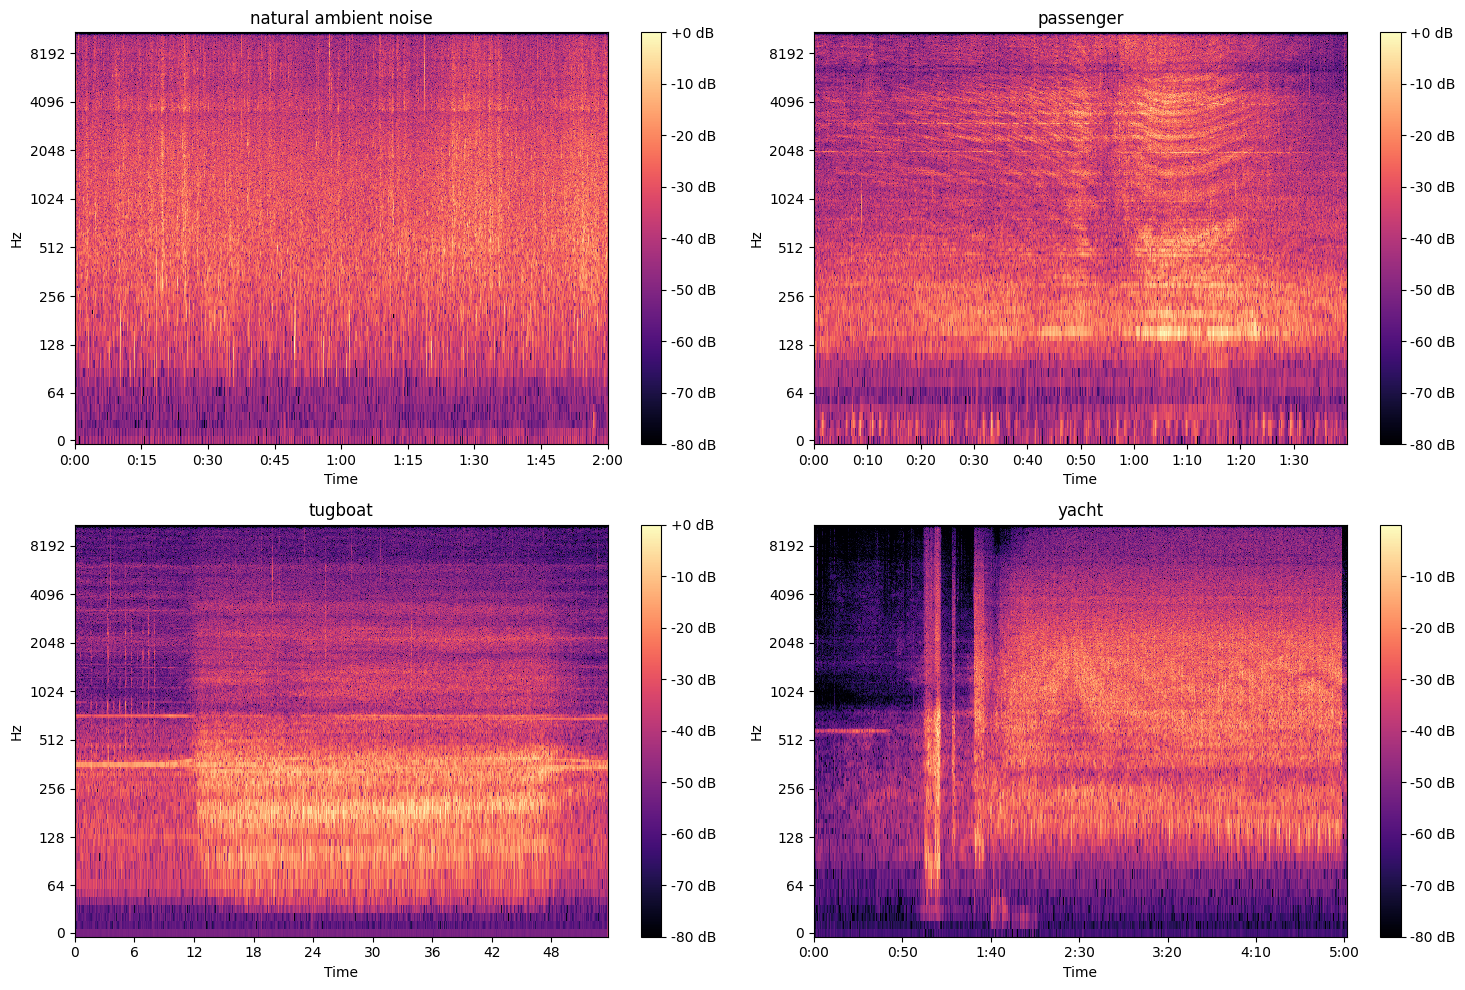

In [19]:
def plot_sfst(df):
    # Randomly select one sample of each class
    random_samples = df.groupby('label').sample(1)
    audio_samples, labels = random_samples['filepath'].tolist(), random_samples['label'].tolist()
    n_fft = 2048
    hop_length = 512

    # Number of samples and columns for the grid
    n_samples = len(random_samples)
    n_cols = 2
    n_rows = (n_samples + 1) // n_cols  # Ensure enough rows to accommodate all samples

    # Create a figure and axis objects
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

    # Flatten the axes array if more than one row
    if n_rows > 1:
        axs = axs.flatten()

    # Plot each audio sample in the grid
    for index, ax in enumerate(axs):
        if index < n_samples:
            audio_file, sample_rate = librosa.load(audio_samples[index])
            stft = librosa.stft(audio_file, n_fft=n_fft, hop_length=hop_length)  # STFT of y
            S_db = librosa.amplitude_to_db(np.abs(stft), ref=np.max)
            img = librosa.display.specshow(S_db,
                                           n_fft=n_fft,
                                           sr=sample_rate,
                                           hop_length=hop_length,
                                           x_axis="time",
                                           y_axis='log',
                                           ax=ax)
            ax.set_title('{}'.format(labels[index]))
            fig.colorbar(img, ax=ax, format="%+2.0f dB")
        else:
            ax.axis('off')  # Hide unused subplots

    fig.tight_layout()
    plt.show()

plot_sfst(df)

### Mel-Spectogram

Next we will visualize the Mel-Spectogram which is a representation of the different frequencies magnitudes at different timesteps. The frequency magnitude is transformed to be on the Mel Scale, that takes into account how humans perceive and process audio signals.

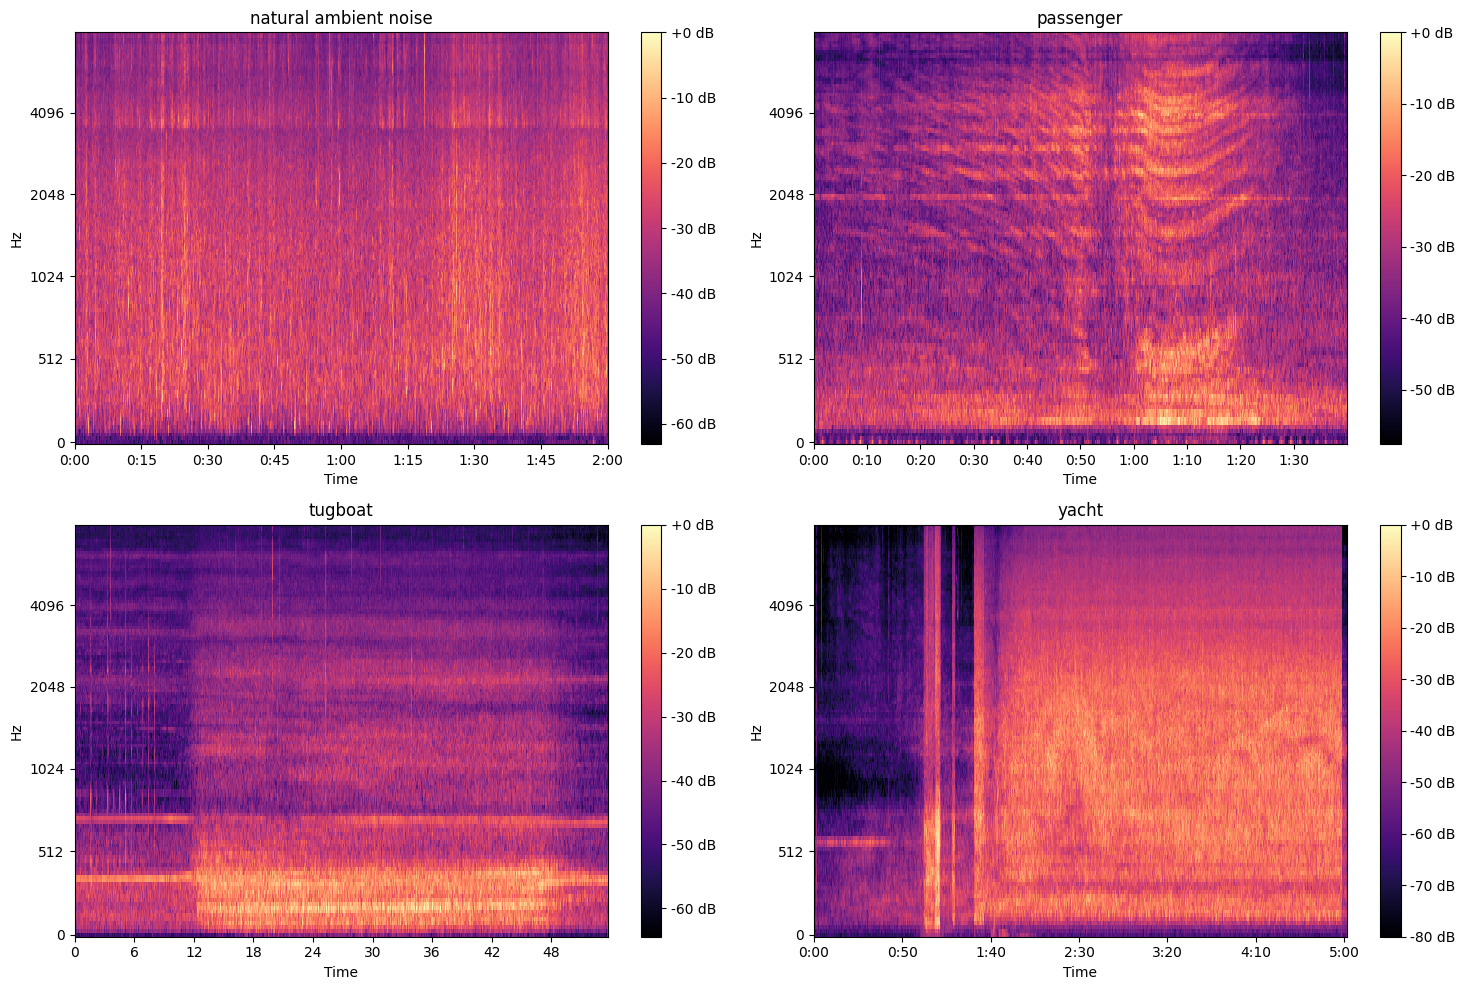

In [28]:
def plot_mel_spectofram(df):
    # Randomly select one sample of each class
    random_samples = df.groupby('label').sample(1)
    audio_samples, labels = random_samples['filepath'].tolist(), random_samples['label'].tolist()
    n_fft = 2048
    hop_length = 512

    # Number of samples and columns for the grid
    n_samples = len(random_samples)
    n_cols = 2
    n_rows = (n_samples + 1) // n_cols  # Ensure enough rows to accommodate all samples

    # Create a figure and axis objects
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

    # Flatten the axes array if more than one row
    if n_rows > 1:
        axs = axs.flatten()

    # Plot each audio sample in the grid
    for index, ax in enumerate(axs):
        if index < n_samples:
            audio_file, sample_rate = librosa.load(audio_samples[index])
            S = librosa.feature.melspectrogram(y=audio_file, sr=sample_rate, n_mels=128, fmax=8000)
            S_dB = librosa.power_to_db(S, ref=np.max)
            img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000, ax=ax)
            ax.set_title('{}'.format(labels[index]))
            fig.colorbar(img, ax=ax, format="%+2.0f dB")
        else:
            ax.axis('off')  # Hide unused subplots

    fig.tight_layout()
    plt.show()

plot_mel_spectofram(df)

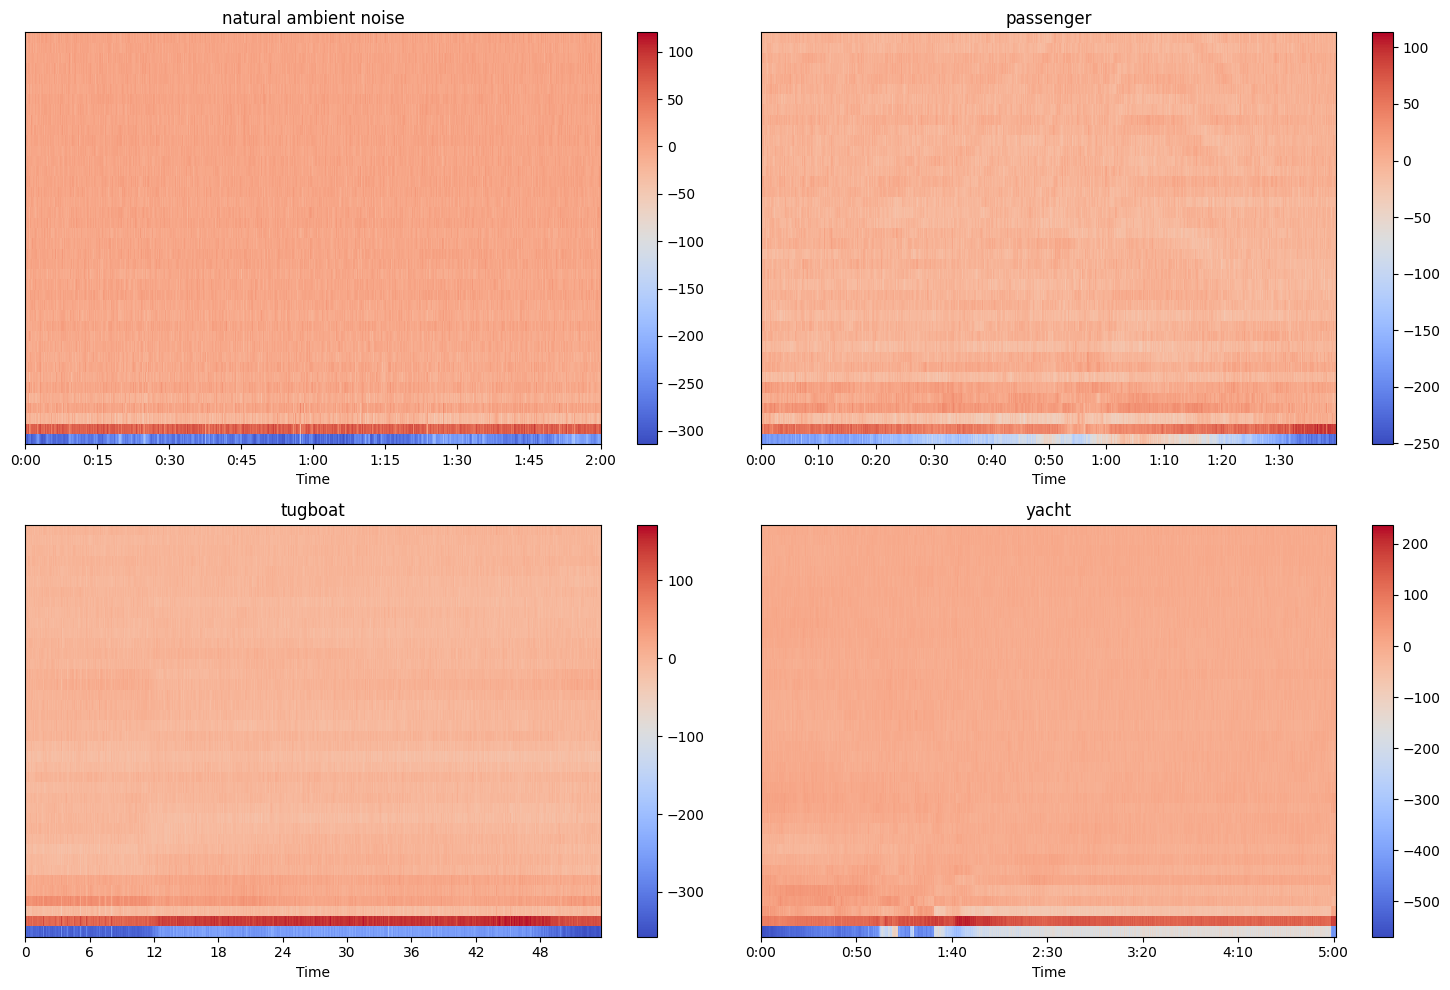

In [26]:
def plot_mfcc(df):
    # Randomly select one sample of each class
    random_samples = df.groupby('label').sample(1)
    audio_samples, labels = random_samples['filepath'].tolist(), random_samples['label'].tolist()
    n_fft = 2048
    hop_length = 512

    # Number of samples and columns for the grid
    n_samples = len(random_samples)
    n_cols = 2
    n_rows = (n_samples + 1) // n_cols  # Ensure enough rows to accommodate all samples

    # Create a figure and axis objects
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

    # Flatten the axes array if more than one row
    if n_rows > 1:
        axs = axs.flatten()

    # Plot each audio sample in the grid
    for index, ax in enumerate(axs):
        if index < n_samples:
            audio_file, sample_rate = librosa.load(audio_samples[index], sr=None)
            mfccs = librosa.feature.mfcc(y=audio_file, sr=sample_rate, n_mfcc=40, n_fft=n_fft, hop_length=hop_length)
            img = librosa.display.specshow(mfccs,
                                           sr=sample_rate,
                                           hop_length=hop_length,
                                           x_axis="time",
                                           ax=ax)
            ax.set_title('{}'.format(labels[index]))
            fig.colorbar(img, ax=ax)
        else:
            ax.axis('off')  # Hide unused subplots

    fig.tight_layout()
    plt.show()

plot_mfcc(df)